**<center> <span style="color:#0F52BA;font-family:serif; font-size:34px;"> E-COMMERCE CUSTOMER CHURN PREDICTION 📈</span> </center>**

<center><span style="font-family:Palatino; font-size:22px;"><i> Did you know that attracting a new customer costs <span style="color:#DC143C;">five times</span> as much as keeping an existing one?</i></span> </center>


<a id = "2" ></a>
#### <b>What is Customer Churn?</b>
<span style="font-size:16px;">  Customer churn is defined as when customers or subscribers discontinue doing business with a firm or service. </span>

<span style="font-size:16px;"> Customers in the E-commerce industry can choose from a variety of service providers and actively switch from one to the next. The E-commmerce business has an annual churn rate of 15-25 percent in this highly competitive market.</span>

<span style="font-size:16px;"> Individualized customer retention is tough because most firms have a large number of customers and can't afford to devote much time to each of them. The costs would be too great, outweighing the additional revenue. However, if a corporation could forecast which customers are likely to leave ahead of time, it could focus customer retention efforts only on these "high risk" clients. The ultimate goal is to expand its coverage area and retrieve more
customers loyalty. The core to succeed in this market lies in the customer itself. 
</span>

<span style="font-size:16px;"> Customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers.</span>

<a id="churn"></a>
<a id = "3" ></a>

<span style="font-size:16px;"><b>To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.</b></span> 

<span style="font-size:16px;"> To detect early signs of potential churn, one must first develop a holistic view of the customers and their interactions across numerous channels, including store/branch visits, product purchase histories, customer service calls, Web-based transactions, and social media interactions, to mention a few. </span> 

<span style="font-size:16px;">As a result, by addressing churn, these businesses may not only preserve their market position, but also grow and thrive. More customers they have in their network, the lower the cost of initiation and the larger the profit. As a result, the company's key focus for success is reducing client attrition and implementing effective retention strategy. </span> 
<a id="reduce"></a>

<a id = "4" ></a>
#### <b> Objectives</b>
I will explore the data and try to answer some questions like:
* What's the % of Churn Customers and customers that keep in with the active services?
* Is there any patterns in Churn Customers based on the gender?
* Is there any patterns/preference in Churn Customers based on the type of service provided?
* What's the most profitable service types?
* Which features and services are most profitable?
* Many more questions that will arise during the analysis
<a id="objective"></a>

## Problem Statement

An E Commerce company or DTH (you can choose either of these two domains) provider is 
facing a lot of competition in the current market and it has become a challenge to retain the 
existing customers in the current situation. Hence, the company wants to develop a model 
through which they can do churn prediction of the accounts and provide segmented offers to the 
potential churners. In this company, account churn is a major thing because 1 account can have 
multiple customers. hence by losing one account the company might be losing more than one 
customer.
You have been assigned to develop a churn prediction model for this company and provide 
business recommendations on the campaign.
Your campaign suggestion should be unique and be very clear on the campaign offer because 
your recommendation will go through the revenue assurance team. If they find that you are 
giving a lot of free (or subsidized) stuff thereby making a loss to the company; they are not going 
to approve your recommendation. 
Hence be very careful while providing campaign recommendation.

## Variable Description

AccountID -- account unique identifier

Churn -- account churn flag (Target)

Tenure --Tenure of account

City_Tier -- Tier of primary customer's city

CC_Contacted_L1 2m--How many times all the customers of the account has contacted customer care in last 12months

Payment -- Preferred Payment mode of the customers in the account

Gender -- Gender of the primary customer of the account

Service_Score -- Satisfaction score given by customers of the account on service provided by company

Account_user_count -- Number of customers tagged with this account

account_segment -- Account segmentation on the basis of spend

CC_Agent_Score -- Satisfaction score given by customers of the account on customer care service provided by company

Marital_Status -- Marital status of the primary customer of the account

rev_per_month -- Monthly average revenue generated by account in last 12 months

Complain_l12m -- Any complaints has been raised by account in last 12 months

rev_growth_yoy -- revenue growth percentage of the account (last 12 months vs last 24 to 13 month)

coupon_used_l12m -- How many times customers have used coupons to do the payment in last 12 months

Day_Since_CC_connect -- Number of days since no customers in the account has contacted the customer care

cashback_l12m -- Monthly average cashback generated by account in last 12 months

Login_device -- Preferred login device of the customers in the account


In [78]:
# IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# IMPORTING THE DATASET

df=pd.read_excel("Customer Churn Data.xlsx",sheet_name='Data for DSBA')
df

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11255,31255,0,10,1.0,34.0,Credit Card,Male,3.0,2,Super,1.0,Married,9,0.0,19,1,4,153.71,Computer
11256,31256,0,13,1.0,19.0,Credit Card,Male,3.0,5,HNI,5.0,Married,7,0.0,16,1,8,226.91,Mobile
11257,31257,0,1,1.0,14.0,Debit Card,Male,3.0,2,Super,4.0,Married,7,1.0,22,1,4,191.42,Mobile
11258,31258,0,23,3.0,11.0,Credit Card,Male,4.0,5,Super,4.0,Married,7,0.0,16,2,9,179.9,Computer


In [3]:
print('The Total rows present in the dataframe is',df.shape[0])
print('The Total columns present in the dataframe is',df.shape[1])

The Total rows present in the dataframe is 11260
The Total columns present in the dataframe is 19


In [4]:
# CHECKING INFO

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [5]:
df.columns

Index(['AccountID', 'Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY',
       'Payment', 'Gender', 'Service_Score', 'Account_user_count',
       'account_segment', 'CC_Agent_Score', 'Marital_Status', 'rev_per_month',
       'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment',
       'Day_Since_CC_connect', 'cashback', 'Login_device'],
      dtype='object')

In [6]:
# Check for duplicate data

dup = df.duplicated()
print('Number of duplicate rows = %d' % (dup.sum()))

Number of duplicate rows = 0


In [7]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
AccountID,11260.0,25629.500000,3250.626350,20000.0,22814.75,25629.5,28444.25,31259.0
Churn,11260.0,0.168384,0.374223,0.0,0.00,0.0,0.00,1.0
City_Tier,11148.0,1.653929,0.915015,1.0,1.00,1.0,3.00,3.0
CC_Contacted_LY,11158.0,17.867091,8.853269,4.0,11.00,16.0,23.00,132.0
Service_Score,11162.0,2.902526,0.725584,0.0,2.00,3.0,3.00,5.0
CC_Agent_Score,11144.0,3.066493,1.379772,1.0,2.00,3.0,4.00,5.0
Complain_ly,10903.0,0.285334,0.451594,0.0,0.00,0.0,1.00,1.0


In [8]:
for col in df.columns:
    if df[col].dtype=='object':
        print(df[col].value_counts())

1     1351
0     1231
8      519
9      496
7      450
10     423
3      410
4      403
5      403
11     388
6      363
12     360
13     359
2      354
14     345
15     311
16     291
19     273
18     253
20     217
17     215
21     170
23     169
22     151
24     147
30     137
28     137
99     131
27     131
26     122
#      116
29     114
25     114
31      96
50       2
51       2
60       2
61       2
Name: Tenure, dtype: int64
Debit Card          4587
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64
Male      6328
Female    4178
M          376
F          270
Name: Gender, dtype: int64
4    4569
3    3261
5    1699
2     526
1     446
@     332
6     315
Name: Account_user_count, dtype: int64
Super           4062
Regular Plus    3862
HNI             1639
Super Plus       771
Regular          520
Regular +        262
Super +           47
Name: account_segment, dtype: int64
Married     5860
Single

## Data Cleaning and Imputation

In [9]:
df['Tenure'].replace(to_replace='#',value=np.nan,inplace=True)
df['Gender'].replace(to_replace=['M','F'],value=['Male','Female'],inplace=True)
df['Account_user_count'].replace(to_replace='@',value=np.nan,inplace=True)
df['account_segment'].replace(to_replace=['Regular +','Super +'],value=['Regular Plus','Super Plus'],inplace=True)
df['rev_per_month'].replace(to_replace='+',value=np.nan,inplace=True)
df['rev_growth_yoy'].replace(to_replace='$',value=np.nan,inplace=True)
df['coupon_used_for_payment'].replace(to_replace=['#','*','$'],value=np.nan,inplace=True)
df['Day_Since_CC_connect'].replace(to_replace='$',value=np.nan,inplace=True)
df['Login_device'].replace(to_replace='&&&&',value=np.nan,inplace=True)
df['cashback'].replace(to_replace='$',value=np.nan,inplace=True)

In [10]:
for col in df.columns:
    if df[col].dtype=='object':
        print(df[col].value_counts())

Debit Card          4587
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64
Male      6704
Female    4448
Name: Gender, dtype: int64
Regular Plus    4124
Super           4062
HNI             1639
Super Plus       818
Regular          520
Name: account_segment, dtype: int64
Married     5860
Single      3520
Divorced    1668
Name: Marital_Status, dtype: int64
Mobile      7482
Computer    3018
Name: Login_device, dtype: int64


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountID,11260.0,25629.500000,3250.626350,20000.0,22814.75,25629.50,28444.25,31259.0
Churn,11260.0,0.168384,0.374223,0.0,0.00,0.00,0.00,1.0
Tenure,11042.0,11.025086,12.879782,0.0,2.00,9.00,16.00,99.0
City_Tier,11148.0,1.653929,0.915015,1.0,1.00,1.00,3.00,3.0
CC_Contacted_LY,11158.0,17.867091,8.853269,4.0,11.00,16.00,23.00,132.0
Service_Score,11162.0,2.902526,0.725584,0.0,2.00,3.00,3.00,5.0
Account_user_count,10816.0,3.692862,1.022976,1.0,3.00,4.00,4.00,6.0
CC_Agent_Score,11144.0,3.066493,1.379772,1.0,2.00,3.00,4.00,5.0
rev_per_month,10469.0,6.362594,11.909686,1.0,3.00,5.00,7.00,140.0
Complain_ly,10903.0,0.285334,0.451594,0.0,0.00,0.00,1.00,1.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11042 non-null  float64
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       10816 non-null  float64
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            10469 non-null  float64
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [13]:
df.isnull().sum().sum()

4361

In [14]:
len(df.columns)

19

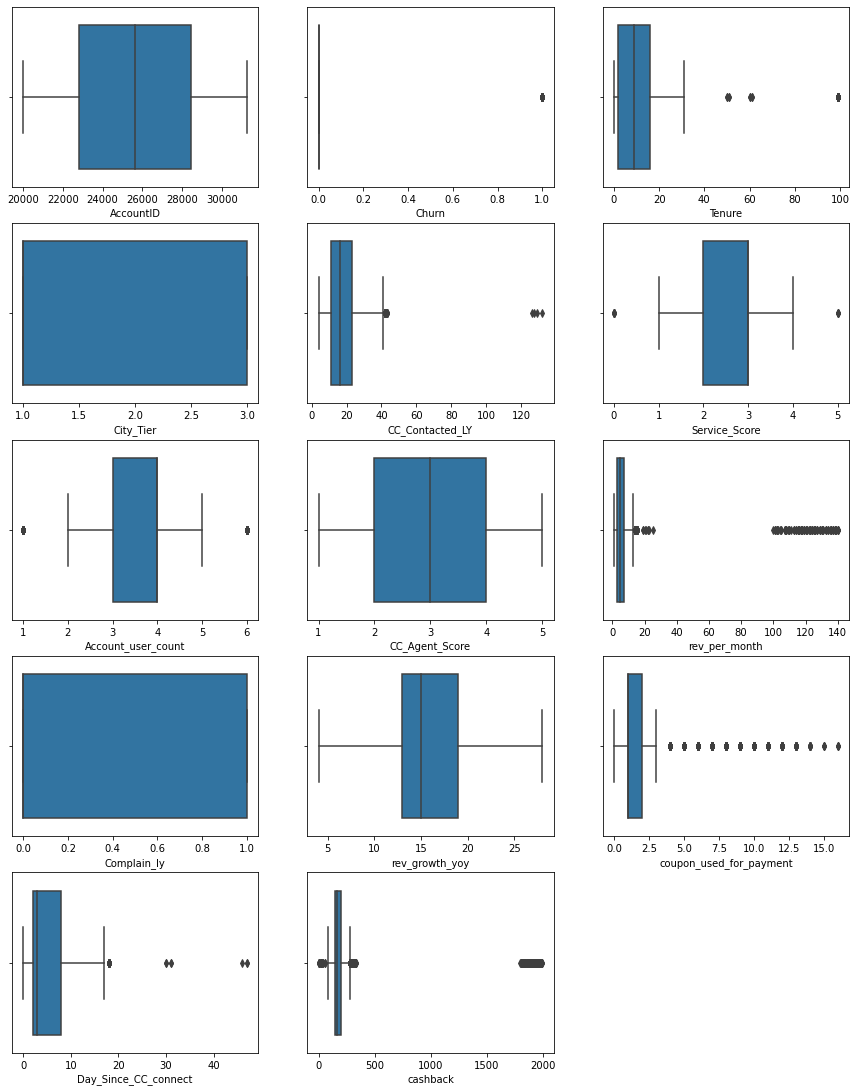

In [15]:
#  SUBPLOTS - FOR Loop
rowCnt = len(df.columns)
colCnt = 3
subCnt = 1

fig = plt.figure(figsize=(15,75))

for i in df.columns:
    if df[i].dtype!='object':
        plt.subplot(rowCnt, colCnt, subCnt)
        plt.xlabel(i, fontsize=10)
        sns.boxplot(df[i],orient='v')
        subCnt = subCnt + 1

In [16]:
from sklearn.impute import SimpleImputer

# Replacing null values with mean values

df_mean = SimpleImputer(missing_values =np.nan, strategy='mean')
df_mean = df_mean.fit(df[['City_Tier','Service_Score','Account_user_count',
                          'CC_Agent_Score','Complain_ly','rev_growth_yoy']])

df[['City_Tier','Service_Score','Account_user_count',
    'CC_Agent_Score','Complain_ly','rev_growth_yoy']] = df_mean.transform(df[['City_Tier','Service_Score',
                                                                              'Account_user_count','CC_Agent_Score',
                                                                              'Complain_ly','rev_growth_yoy']])

In [17]:
# Replacing null values with median values because of outliers

df_median = SimpleImputer(missing_values =np.nan, strategy='median')
df_median = df_median.fit(df[['Tenure','CC_Contacted_LY','rev_per_month','coupon_used_for_payment',
                              'Day_Since_CC_connect', 'cashback']])

df[['Tenure','CC_Contacted_LY','rev_per_month','coupon_used_for_payment',
    'Day_Since_CC_connect', 'cashback']]= df_median.transform(df[['Tenure','CC_Contacted_LY','rev_per_month',
                                                                  'coupon_used_for_payment','Day_Since_CC_connect',
                                                                  'cashback']])

In [18]:
# Replacing null values with mode values for categorical values.

df_mode = SimpleImputer(missing_values =np.nan, strategy='most_frequent')
df_mode = df_mode.fit(df[['Payment', 'Gender','account_segment','Marital_Status','Login_device']])

df[['Payment', 'Gender','account_segment',
    'Marital_Status','Login_device']]= df_mode.transform(df[['Payment', 'Gender','account_segment',
                                                             'Marital_Status','Login_device']])

In [19]:
df.isnull().sum()

AccountID                  0
Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

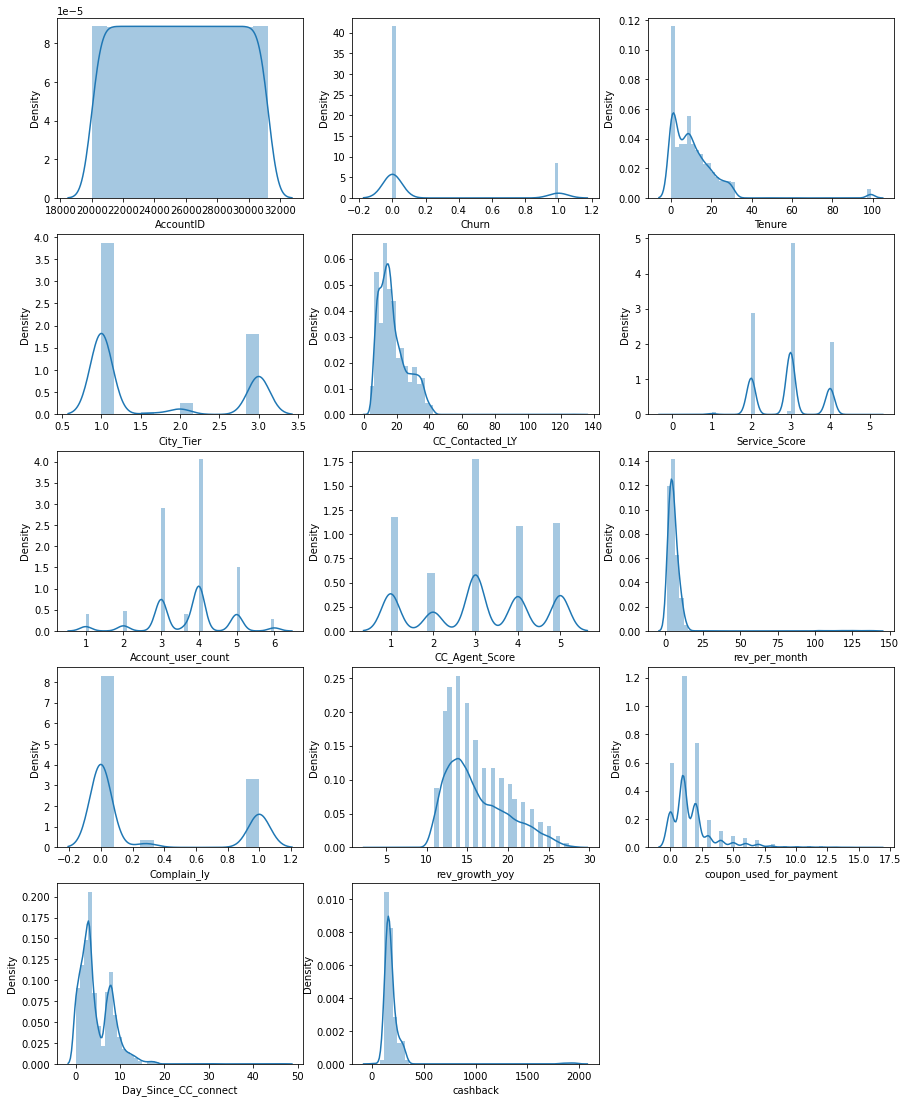

In [20]:
#  SUBPLOTS - FOR Loop
rowCnt = len(df.columns)
colCnt = 3
subCnt = 1

fig = plt.figure(figsize=(15,75))

for i in df.columns:
    if df[i].dtype!='object':
        plt.subplot(rowCnt, colCnt, subCnt)
        plt.xlabel(i, fontsize=10)
        sns.distplot(df[i])
        subCnt = subCnt + 1

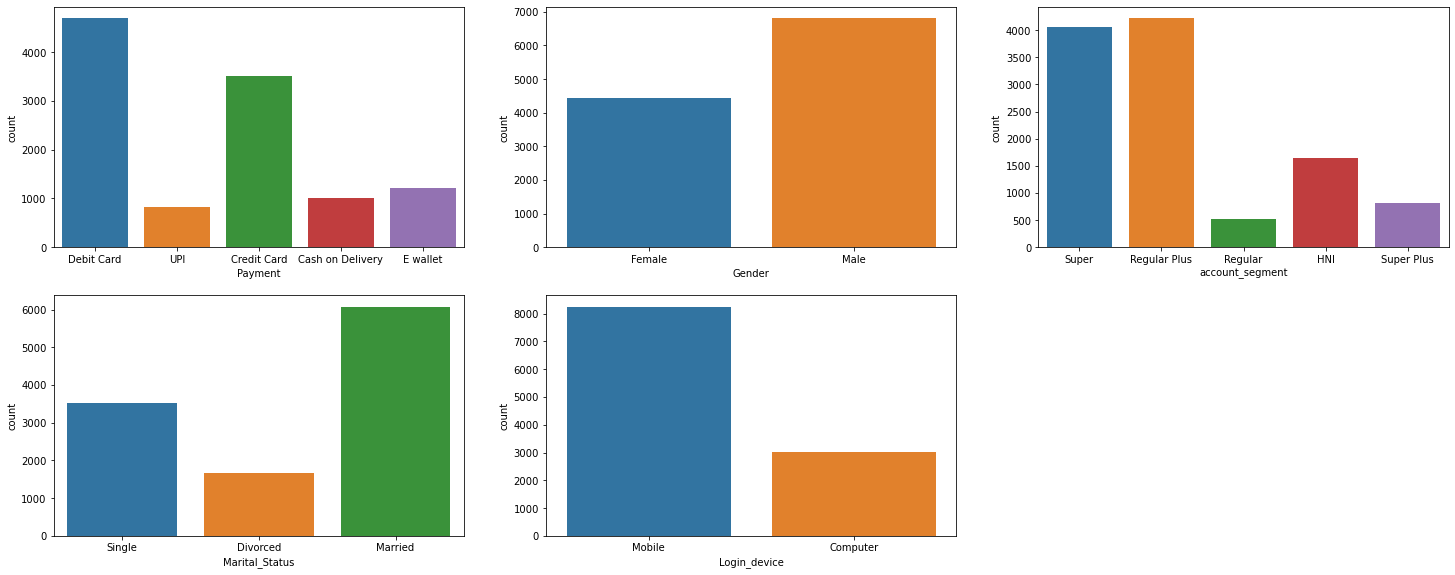

In [21]:
#  SUBPLOTS - FOR Loop
rowCnt = len(df.columns)
colCnt = 3
subCnt = 1

fig = plt.figure(figsize=(25,100))

for i in df.columns:
    if df[i].dtype=='object':
        plt.subplot(rowCnt, colCnt, subCnt)
        plt.xlabel(i, fontsize=10)
        sns.countplot(df[i])
        subCnt = subCnt + 1

<AxesSubplot:>

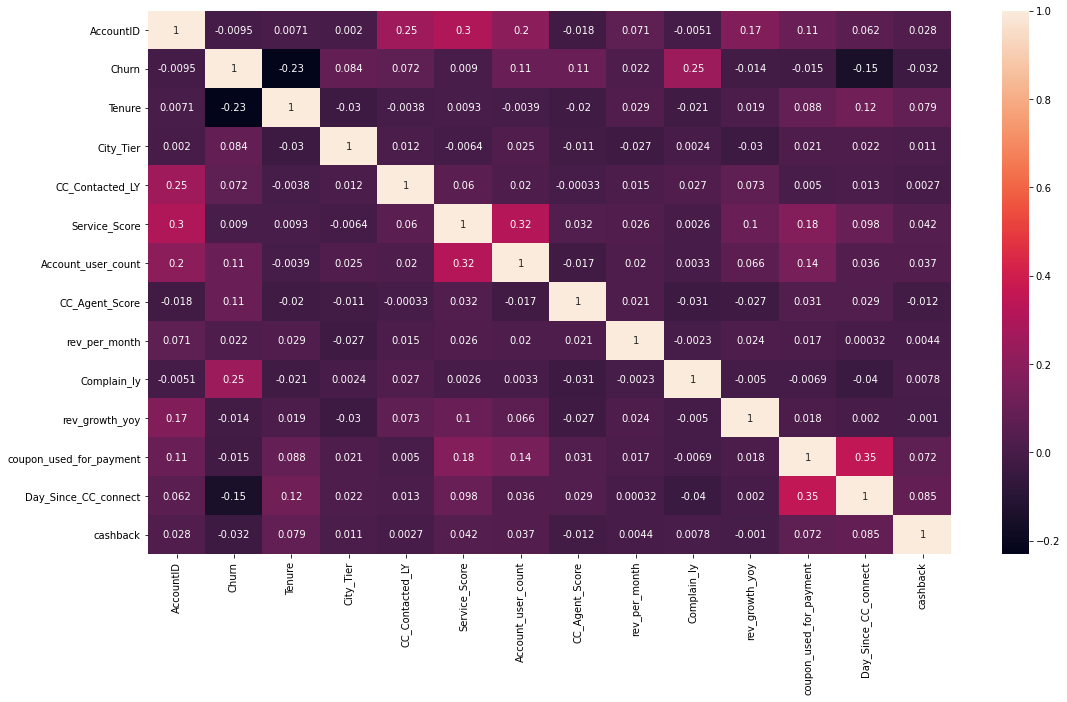

In [22]:
plt.figure(figsize = (18,10))
sns.heatmap(df.corr(),annot =True)

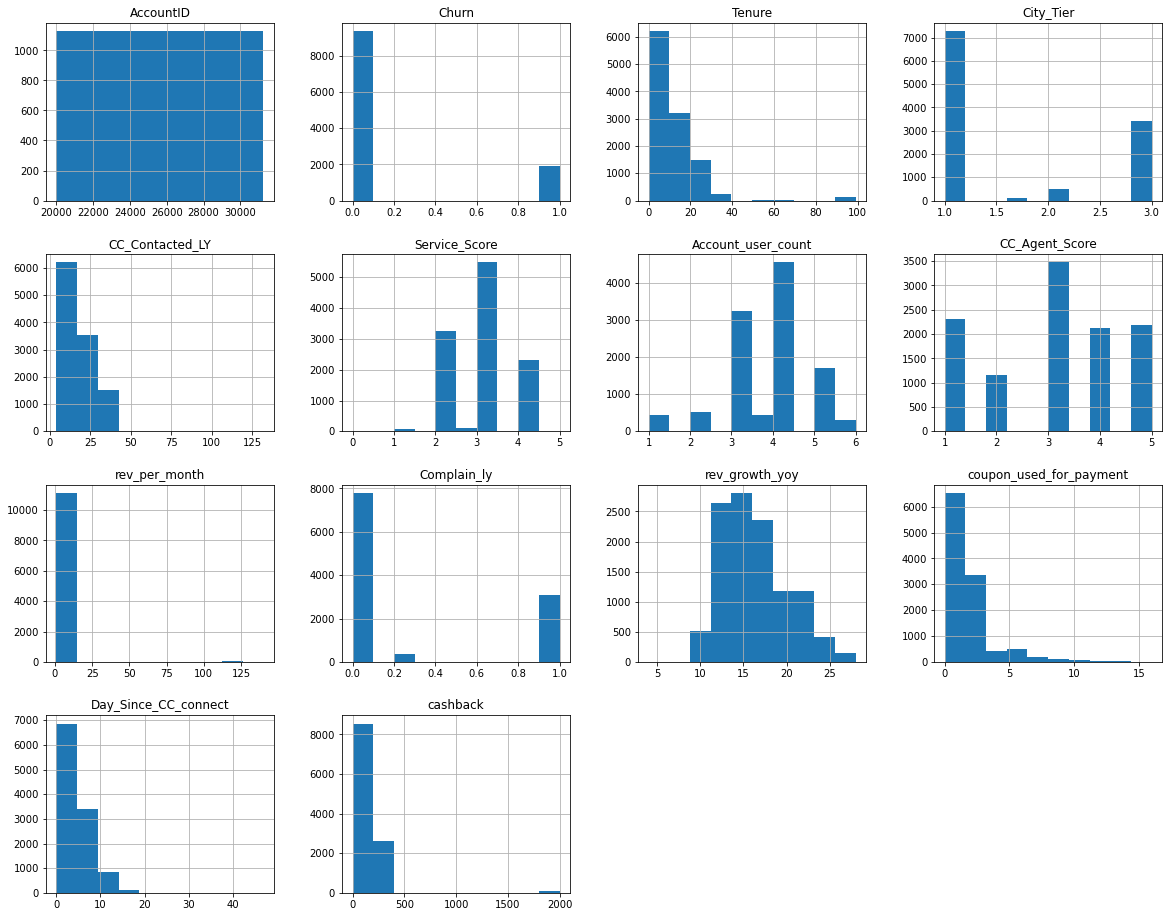

In [23]:
df.hist(figsize=(20,16))
plt.show()  #showing the charts of different columns
#This also helps in finding number of counts in each column

<AxesSubplot:xlabel='Service_Score', ylabel='Account_user_count'>

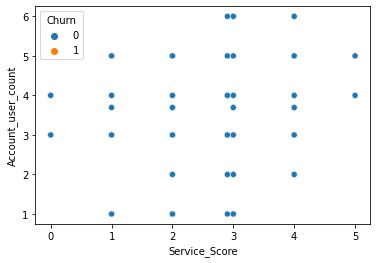

In [24]:
sns.scatterplot(x='Service_Score',y='Account_user_count',hue='Churn',data=df)

<AxesSubplot:xlabel='coupon_used_for_payment', ylabel='Day_Since_CC_connect'>

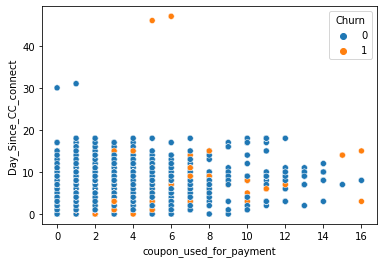

In [25]:
sns.scatterplot(x='coupon_used_for_payment',y='Day_Since_CC_connect',hue='Churn',data=df)

Data is highly imbalanced since Customer churn column has 1 values less than 2000, and 0 value more than 9000.

In [26]:
# creating new column with the help of customer score.
df['Customer_Satisfaction_Score']=df['Service_Score']+df['CC_Agent_Score']

In [27]:
# Removing unwanted column - Account ID

df.drop(['AccountID','Service_Score','CC_Agent_Score'],axis=1,inplace=True)


In [28]:
df.to_excel('Churn_EDA_data.xlsx')

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(1, 0, 'Churn'),
  Text(2, 0, 'Tenure'),
  Text(3, 0, 'City_Tier'),
  Text(4, 0, 'CC_Contacted_LY'),
  Text(5, 0, 'Account_user_count'),
  Text(6, 0, 'rev_per_month'),
  Text(7, 0, 'Complain_ly'),
  Text(8, 0, 'rev_growth_yoy'),
  Text(9, 0, 'coupon_used_for_payment'),
  Text(10, 0, 'Day_Since_CC_connect'),
  Text(11, 0, 'cashback'),
  Text(12, 0, 'Customer_Satisfaction_Score')])

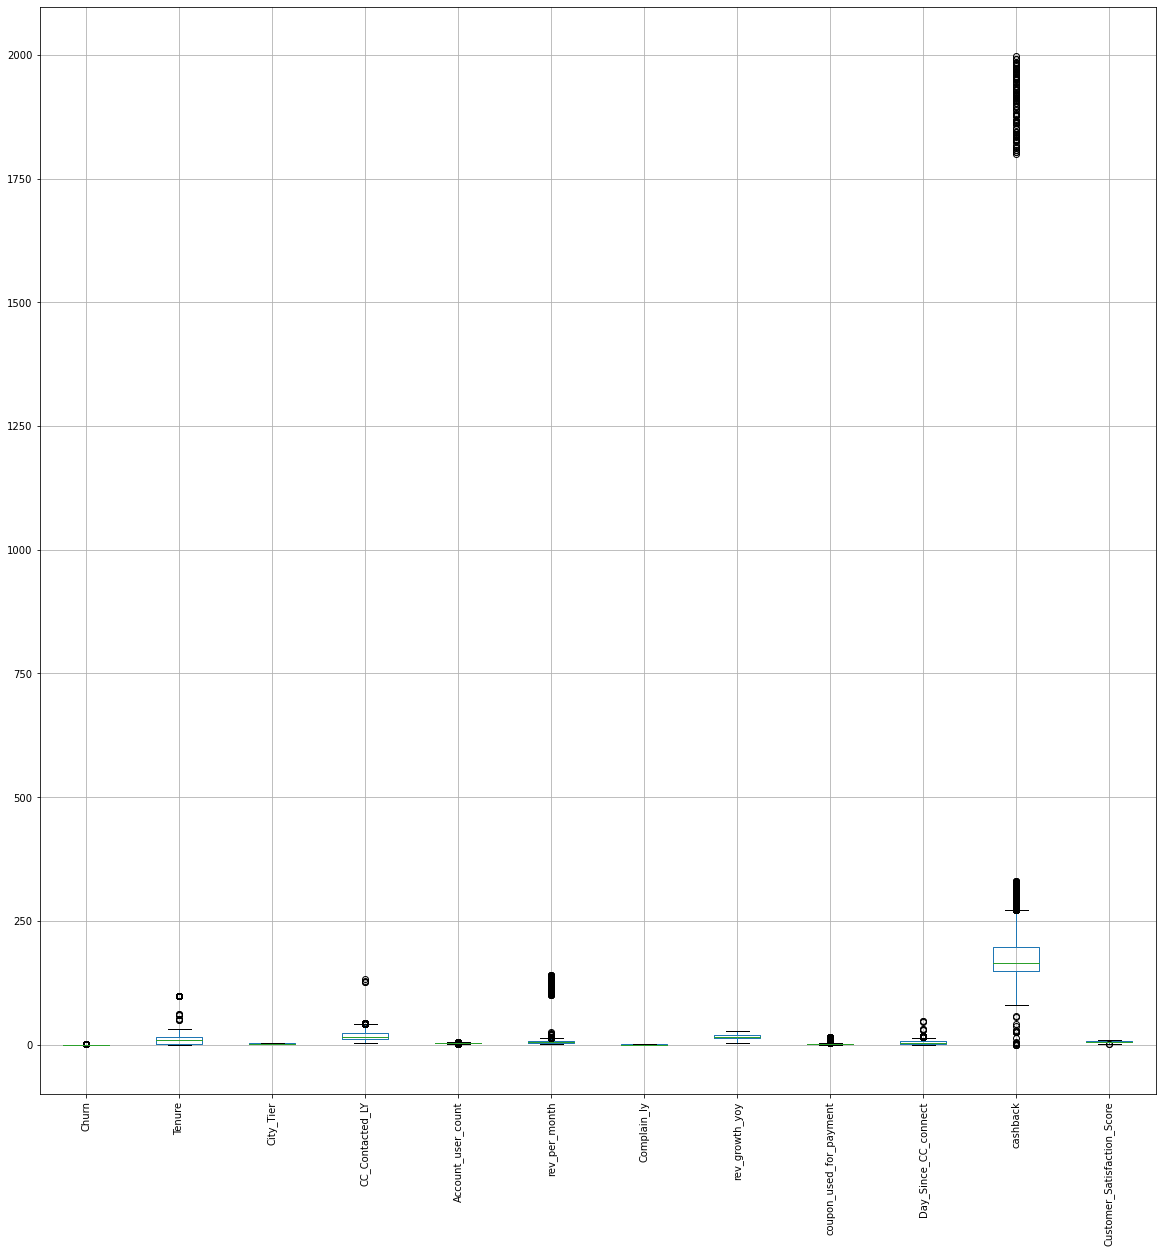

In [29]:
df.boxplot(figsize=(20,20))
plt.xticks(rotation=90)

In [30]:
len(df.columns)

17

In [31]:
df

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Account_user_count,account_segment,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,Customer_Satisfaction_Score
0,1,4.0,3.0,6.0,Debit Card,Female,3.0,Super,Single,9.0,1.0,11.0,1.0,5.0,159.93,Mobile,5.0
1,1,0.0,1.0,8.0,UPI,Male,4.0,Regular Plus,Single,7.0,1.0,15.0,0.0,0.0,120.90,Mobile,6.0
2,1,0.0,1.0,30.0,Debit Card,Male,4.0,Regular Plus,Single,6.0,1.0,14.0,0.0,3.0,165.25,Mobile,5.0
3,1,0.0,3.0,15.0,Debit Card,Male,4.0,Super,Single,8.0,0.0,23.0,0.0,3.0,134.07,Mobile,7.0
4,1,0.0,1.0,12.0,Credit Card,Male,3.0,Regular Plus,Single,3.0,0.0,11.0,1.0,3.0,129.60,Mobile,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11255,0,10.0,1.0,34.0,Credit Card,Male,2.0,Super,Married,9.0,0.0,19.0,1.0,4.0,153.71,Computer,4.0
11256,0,13.0,1.0,19.0,Credit Card,Male,5.0,HNI,Married,7.0,0.0,16.0,1.0,8.0,226.91,Mobile,8.0
11257,0,1.0,1.0,14.0,Debit Card,Male,2.0,Super,Married,7.0,1.0,22.0,1.0,4.0,191.42,Mobile,7.0
11258,0,23.0,3.0,11.0,Credit Card,Male,5.0,Super,Married,7.0,0.0,16.0,2.0,9.0,179.90,Computer,8.0


0    9364
1    1896
Name: Churn, dtype: int64


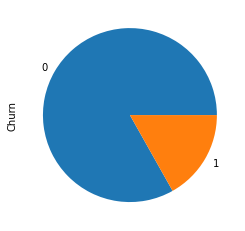

In [32]:
churn_count = df['Churn'].value_counts()
print(churn_count)
churn_count.plot.pie();

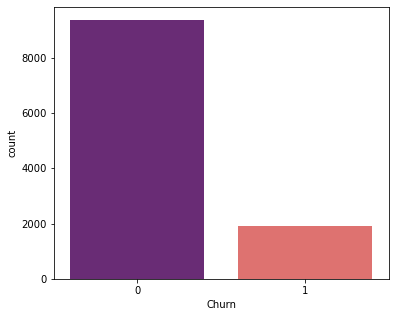

In [33]:
plt.figure(figsize=(6,5))
sns.countplot(x="Churn", data=df, palette='magma');

In [34]:
cat_col=[]
for col in df.columns:
    if df[col].dtype=='object':
        cat_col.append(col)
cat_col

['Payment', 'Gender', 'account_segment', 'Marital_Status', 'Login_device']

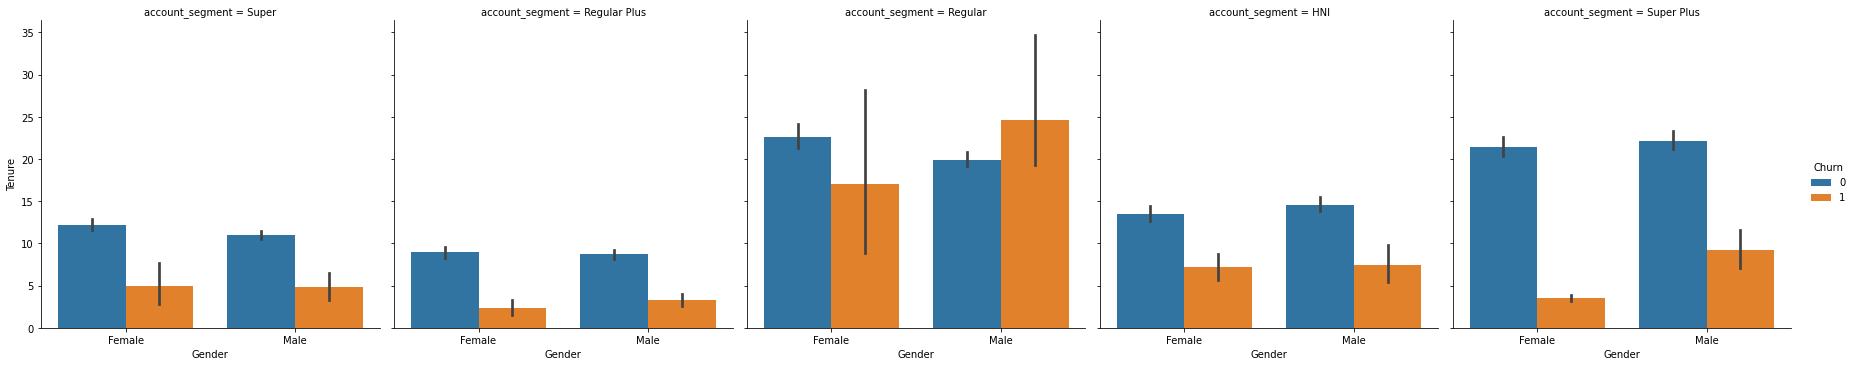

In [35]:
sns.catplot(x='Gender',y = 'Tenure',hue="Churn",col="account_segment",data=df,kind="bar")

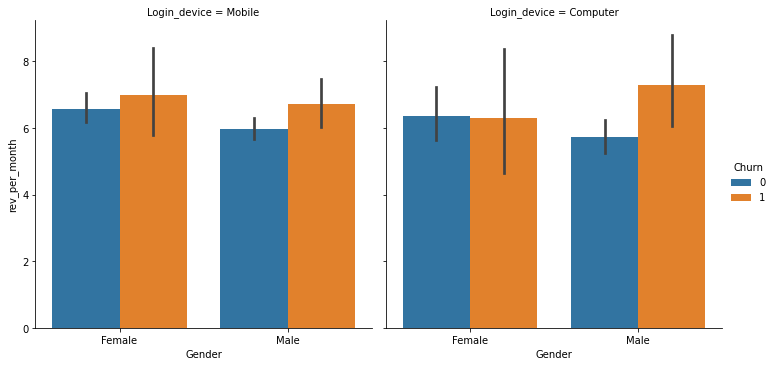

In [36]:
sns.catplot(x='Gender',y = 'rev_per_month',hue="Churn",col='Login_device',data=df,kind="bar")

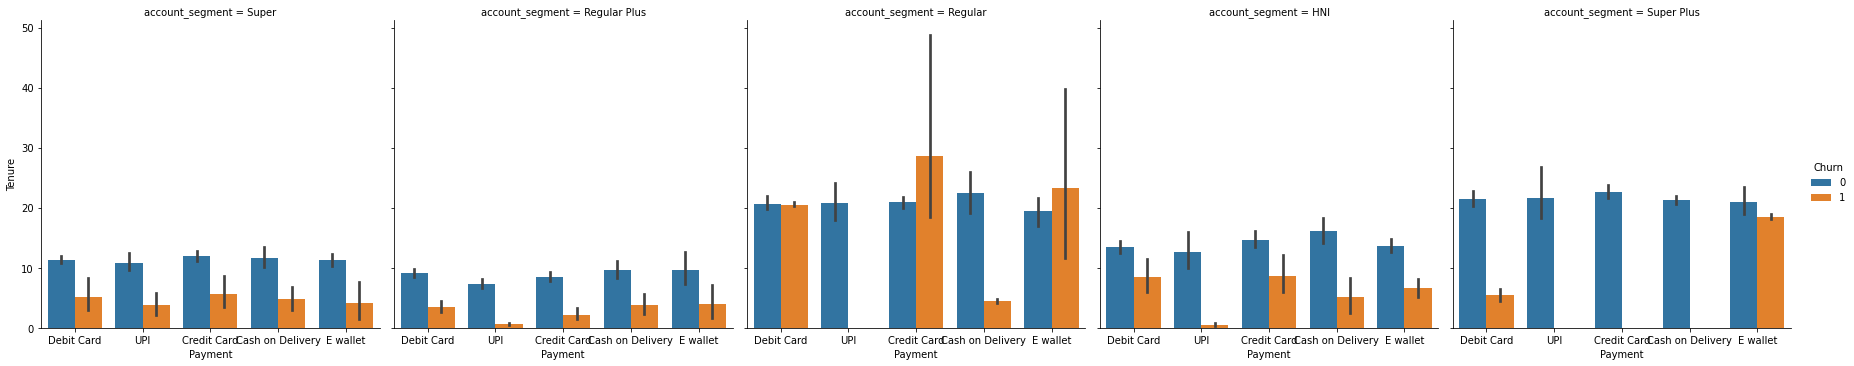

In [37]:
sns.catplot(x='Payment',y = 'Tenure',hue="Churn",col="account_segment",data=df,kind="bar")

In [38]:
# sns.pairplot(df,hue='Churn')

In [39]:
zero  = df[df['Churn']==0]   #zero values in outcome column
one = df[df['Churn']==1]  # one values in outcome column
from sklearn.utils import resample
df_minority_upsampled = resample(one, replace = True, n_samples = 5000) 
#concatenate
df = pd.concat([zero, df_minority_upsampled])

from sklearn.utils import shuffle
df = shuffle(df) # shuffling so that there is particular sequence

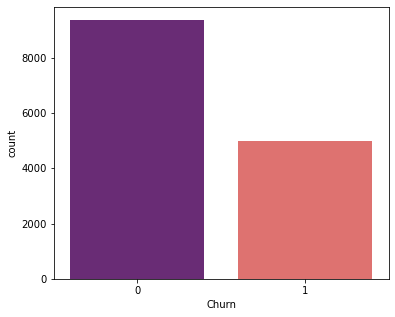

In [40]:
plt.figure(figsize=(6,5))
sns.countplot(x="Churn", data=df, palette='magma');

In [41]:
df1=df.copy()
df1.drop('Churn',axis=1,inplace=True)

In [42]:
num_col=[]
for col in df1.columns:
    if df1[col].dtype!='object':
        num_col.append(col)
num_col

['Tenure',
 'City_Tier',
 'CC_Contacted_LY',
 'Account_user_count',
 'rev_per_month',
 'Complain_ly',
 'rev_growth_yoy',
 'coupon_used_for_payment',
 'Day_Since_CC_connect',
 'cashback',
 'Customer_Satisfaction_Score']

In [43]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range


for col in num_col:
    low,upp=remove_outlier(df1[col])
    df1[col]=np.where(df1[col]<low,low,df1[col])
    df1[col]=np.where(df1[col]>upp,upp,df1[col])

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(1, 0, 'Tenure'),
  Text(2, 0, 'City_Tier'),
  Text(3, 0, 'CC_Contacted_LY'),
  Text(4, 0, 'Account_user_count'),
  Text(5, 0, 'rev_per_month'),
  Text(6, 0, 'Complain_ly'),
  Text(7, 0, 'rev_growth_yoy'),
  Text(8, 0, 'coupon_used_for_payment'),
  Text(9, 0, 'Day_Since_CC_connect'),
  Text(10, 0, 'cashback'),
  Text(11, 0, 'Customer_Satisfaction_Score')])

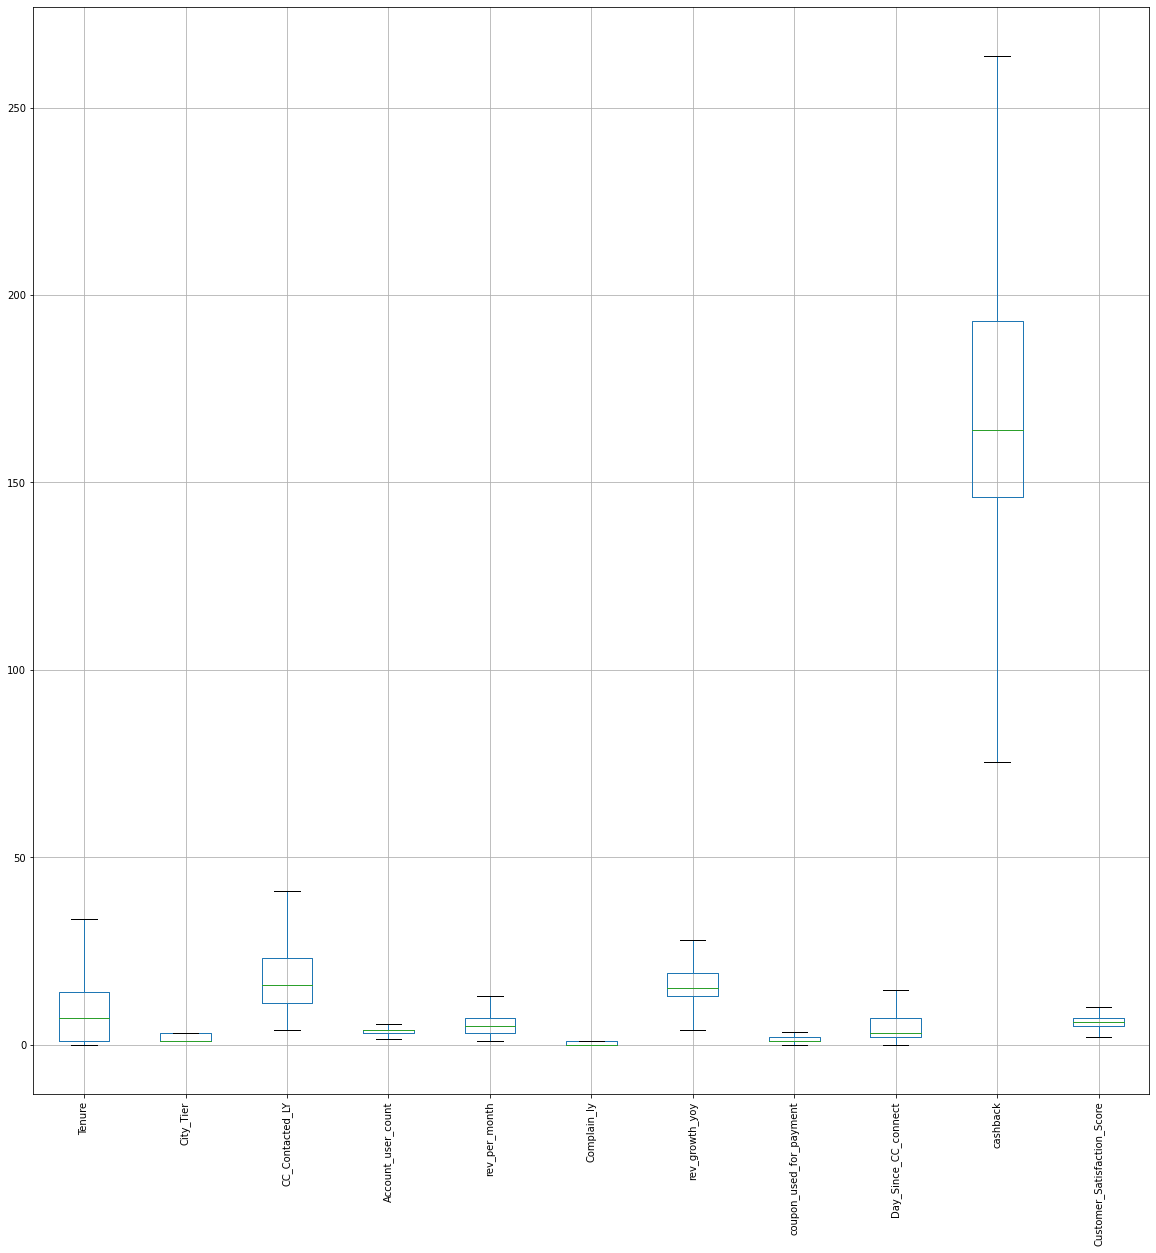

In [44]:
df1.boxplot(figsize=(20,20))
plt.xticks(rotation=90)

In [45]:
#Checking which columns are mostly correlated with the target
df.corr().abs()['Churn'].sort_values(ascending = False)

Churn                          1.000000
Tenure                         0.303533
Complain_ly                    0.297566
Day_Since_CC_connect           0.196321
Account_user_count             0.132988
Customer_Satisfaction_Score    0.129726
City_Tier                      0.108381
CC_Contacted_LY                0.084690
cashback                       0.049238
rev_per_month                  0.041237
rev_growth_yoy                 0.023765
coupon_used_for_payment        0.015341
Name: Churn, dtype: float64

In [46]:
for col in df.columns:
    if df[col].dtype=='object':
        print(df[col].value_counts())

Debit Card          5866
Credit Card         4341
E wallet            1673
Cash on Delivery    1444
UPI                 1040
Name: Payment, dtype: int64
Male      8841
Female    5523
Name: Gender, dtype: int64
Regular Plus    6092
Super           4724
HNI             2064
Super Plus       896
Regular          588
Name: account_segment, dtype: int64
Married     7259
Single      5050
Divorced    2055
Name: Marital_Status, dtype: int64
Mobile      10381
Computer     3983
Name: Login_device, dtype: int64


In [47]:
df=pd.get_dummies(df,columns=['Payment','Gender','Marital_Status','Login_device'],drop_first=True)
df.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Account_user_count,account_segment,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,...,cashback,Customer_Satisfaction_Score,Payment_Credit Card,Payment_Debit Card,Payment_E wallet,Payment_UPI,Gender_Male,Marital_Status_Married,Marital_Status_Single,Login_device_Mobile
3095,1,1.0,1.0,10.0,4.0,Regular Plus,7.0,0.000000,14.0,2.0,...,165.31,9.0,1,0,0,0,1,0,0,1
1387,1,0.0,1.0,31.0,5.0,Regular Plus,2.0,0.000000,12.0,0.0,...,122.93,5.0,0,1,0,0,1,0,1,1
12,1,9.0,1.0,11.0,3.0,Regular Plus,2.0,1.000000,13.0,2.0,...,134.41,5.0,0,0,0,0,1,0,1,1
4286,1,21.0,1.0,30.0,4.0,HNI,5.0,0.285334,13.0,8.0,...,228.12,5.0,1,0,0,0,0,1,0,1
8979,0,2.0,3.0,17.0,4.0,Super,7.0,0.000000,15.0,2.0,...,180.08,6.0,1,0,0,0,1,1,0,1


In [48]:
df['account_segment']=pd.Categorical(df['account_segment']).codes

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14364 entries, 3095 to 8938
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        14364 non-null  int64  
 1   Tenure                       14364 non-null  float64
 2   City_Tier                    14364 non-null  float64
 3   CC_Contacted_LY              14364 non-null  float64
 4   Account_user_count           14364 non-null  float64
 5   account_segment              14364 non-null  int8   
 6   rev_per_month                14364 non-null  float64
 7   Complain_ly                  14364 non-null  float64
 8   rev_growth_yoy               14364 non-null  float64
 9   coupon_used_for_payment      14364 non-null  float64
 10  Day_Since_CC_connect         14364 non-null  float64
 11  cashback                     14364 non-null  float64
 12  Customer_Satisfaction_Score  14364 non-null  float64
 13  Payment_Credit

<AxesSubplot:>

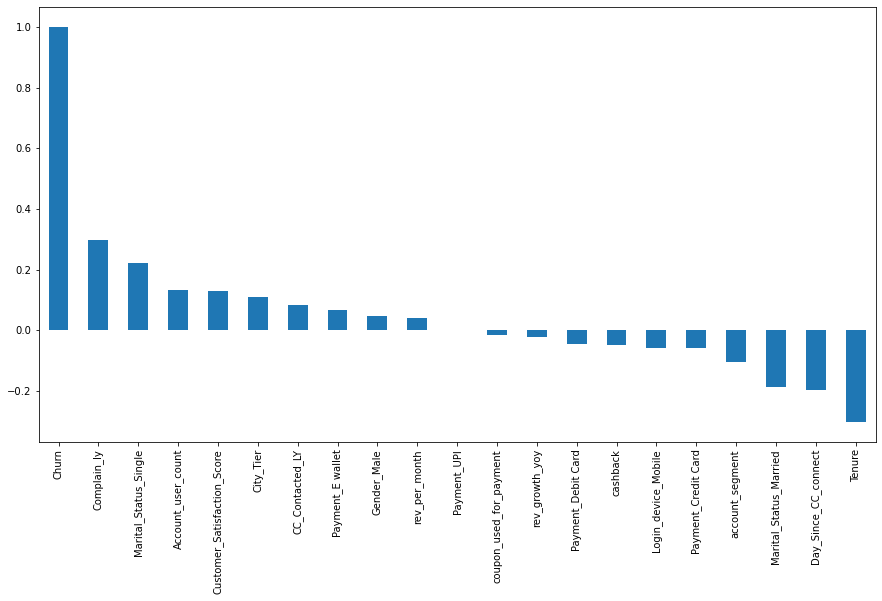

In [50]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [51]:
df['cashback'].mean()

191.2193093845723

In [52]:
df['Tenure'].groupby(df['Churn']).mean()

Churn
0    12.310124
1     4.242200
Name: Tenure, dtype: float64

In [53]:
df['Complain_ly'].groupby(df['Churn']).mean()

Churn
0    0.235830
1    0.526989
Name: Complain_ly, dtype: float64

In [54]:
X = df.drop(['Churn'],axis=1)
y = df.pop('Churn')


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_col=list(X.columns)
X=scaler.fit_transform(X)
X=pd.DataFrame(X,columns=X_col)
X

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [55]:
X

,Tenure,City_Tier,CC_Contacted_LY,Account_user_count,account_segment,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Customer_Satisfaction_Score,Payment_Credit Card,Payment_Debit Card,Payment_E wallet,Payment_UPI,Gender_Male,Marital_Status_Married,Marital_Status_Single,Login_device_Mobile
0,-0.671447,-0.750218,-0.914665,0.255865,-0.115439,0.038260,-0.723394,-0.570743,0.112129,-0.360954,-0.149775,1.876421,1.519511,-0.830831,-0.363078,-0.279383,0.790382,-1.010779,-0.736339,0.619420
1,-0.750424,-0.750218,1.452323,1.251286,-0.115439,-0.365237,-0.723394,-1.101324,-0.915053,-0.915236,-0.394763,-0.668016,-0.658106,1.203614,-0.363078,-0.279383,0.790382,-1.010779,1.358071,0.619420
2,-0.039626,-0.750218,-0.801951,-0.739556,-0.115439,-0.365237,1.422027,-0.836034,0.112129,-0.638095,-0.328400,-0.668016,-0.658106,-0.830831,-0.363078,-0.279383,0.790382,-1.010779,1.358071,0.619420
3,0.908104,-0.750218,1.339609,0.255865,-1.957843,-0.123139,-0.111232,-0.836034,3.193676,0.747608,0.213313,-0.668016,1.519511,-0.830831,-0.363078,-0.279383,-1.265212,0.989336,-0.736339,0.619420
4,-0.592469,1.415693,-0.125669,0.255865,0.805763,0.038260,-0.723394,-0.305453,0.112129,-0.360954,-0.064393,-0.031907,1.519511,-0.830831,-0.363078,-0.279383,0.790382,0.989336,-0.736339,0.619420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14359,-0.671447,1.415693,-0.125669,-0.739556,0.805763,-0.284538,1.422027,1.816871,0.112129,0.193327,-0.085262,-0.031907,1.519511,-0.830831,-0.363078,-0.279383,-1.265212,0.989336,-0.736339,-1.614412
14360,0.039351,-0.042042,-1.140093,0.255865,0.805763,-0.123139,-0.723394,-0.305453,0.625720,1.856171,-0.124166,-1.304126,-0.658106,1.203614,-0.363078,-0.279383,-1.265212,-1.010779,-0.736339,0.619420
14361,0.513217,-0.750218,0.325186,-0.739556,-0.115439,-0.445936,-0.723394,1.286290,-0.915053,0.747608,-0.344933,-1.940235,-0.658106,1.203614,-0.363078,-0.279383,-1.265212,-1.010779,1.358071,-1.614412
14362,1.539925,-0.750218,-1.027379,1.251286,-0.115439,0.280358,-0.723394,1.286290,-0.401462,0.193327,-0.228913,-0.668016,-0.658106,-0.830831,-0.363078,-0.279383,0.790382,0.989336,-0.736339,0.619420


In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix,roc_auc_score,classification_report

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
grid={'penalty':['l2','l1','none','elasticnet'],
      'solver':['saga','lbfgs','newton-cg','liblinear','sag'],
      'tol':[0.0001,0.00001],
      'C':[0.01,0.1,1.0,1.5,2,5],
      'max_iter':[50,100,1000]}
    
lr_model = LogisticRegression(max_iter=10000,random_state=1)

grid_search = GridSearchCV(estimator = lr_model, param_grid = grid, cv =5,scoring='f1')

In [59]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000, random_state=1),
             param_grid={'C': [0.01, 0.1, 1.0, 1.5, 2, 5],
                         'max_iter': [50, 100, 1000],
                         'penalty': ['l2', 'l1', 'none', 'elasticnet'],
                         'solver': ['saga', 'lbfgs', 'newton-cg', 'liblinear',
                                    'sag'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [60]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'C': 0.1, 'max_iter': 50, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.0001} 

LogisticRegression(C=0.1, max_iter=50, random_state=1, solver='liblinear')


In [61]:
best_model = grid_search.best_estimator_
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.206532,0.793468
1,0.978494,0.021506
2,0.941419,0.058581
3,0.942845,0.057155
4,0.941942,0.058058


The accuracy score for the Training dataset is: 0.8135152696556205


The classification report for the Training dataset is:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      7076
           1       0.76      0.67      0.71      3697

    accuracy                           0.81     10773
   macro avg       0.80      0.78      0.79     10773
weighted avg       0.81      0.81      0.81     10773



The accuracy score for the Testing dataset is: 0.8067390698969646


The classification report for the Testing dataset is:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      2288
           1       0.77      0.66      0.71      1303

    accuracy                           0.81      3591
   macro avg       0.80      0.77      0.78      3591
weighted avg       0.80      0.81      0.80      3591





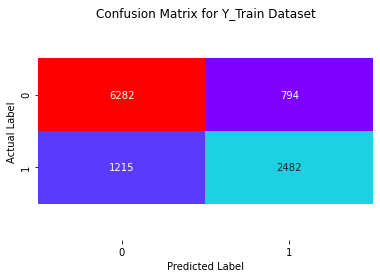

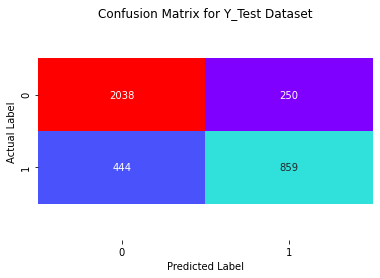

In [62]:
# PERFORMANCE METRIC FOR TRAINING AND TESTING DATASET

print('The accuracy score for the Training dataset is:',best_model.score(X_train, y_train))
print('\n')
print('The classification report for the Training dataset is:')
print(classification_report(y_train,ytrain_predict))
print('\n')
print('The accuracy score for the Testing dataset is:',best_model.score(X_test, y_test))
print('\n')
print('The classification report for the Testing dataset is:')
print(classification_report(y_test,ytest_predict))
print('\n')

confusion_matrix(y_train,ytrain_predict)
ax=sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Y_Train Dataset')
plt.show()

confusion_matrix(y_test,ytest_predict)
ax=sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Y_Test Dataset')
plt.show()

AUC: 0.866


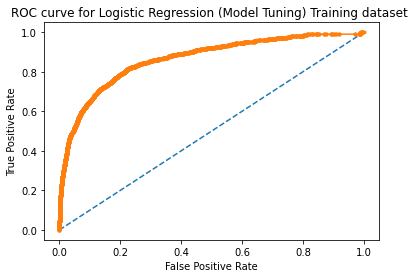

AUC: 0.862


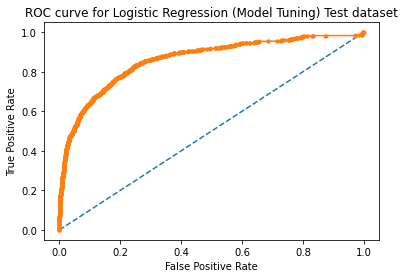

In [63]:
# AUC and ROC for the training data

# predict probabilities
probs = grid_search.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
logm_train_fpr, logm_train_tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logm_train_fpr, logm_train_tpr, marker='.')
plt.title('ROC curve for Logistic Regression (Model Tuning) Training dataset ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

# AUC and ROC for the testing data

# predict probabilities
probs = grid_search.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
logm_test_fpr, logm_test_tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logm_test_fpr, logm_test_tpr, marker='.')
plt.title('ROC curve for Logistic Regression (Model Tuning) Test dataset')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix,roc_auc_score,classification_report

In [65]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [66]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=8)

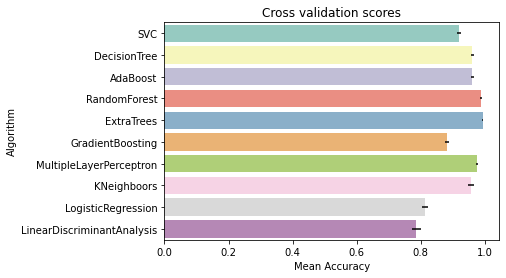

In [67]:
# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
                       "RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors",
                            "LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [80]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [4,8],
              "max_features": [ 5, 10],
              "min_samples_split": [5, 10],
              "min_samples_leaf": [5, 10],
              "bootstrap": [True],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 2, verbose = 1)

gsRFC.fit(X_train,y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 8 folds for each of 32 candidates, totalling 256 fits


0.913580795913212

In [81]:
ytrain_predict = RFC_best.predict(X_train)
ytest_predict = RFC_best.predict(X_test)

The accuracy score for the Training dataset is: 0.9256474519632414


The classification report for the Training dataset is:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      7076
           1       0.92      0.86      0.89      3697

    accuracy                           0.93     10773
   macro avg       0.92      0.91      0.92     10773
weighted avg       0.93      0.93      0.93     10773



The accuracy score for the Testing dataset is: 0.899749373433584


The classification report for the Testing dataset is:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      2288
           1       0.89      0.83      0.86      1303

    accuracy                           0.90      3591
   macro avg       0.90      0.88      0.89      3591
weighted avg       0.90      0.90      0.90      3591





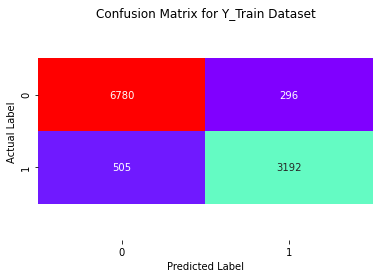

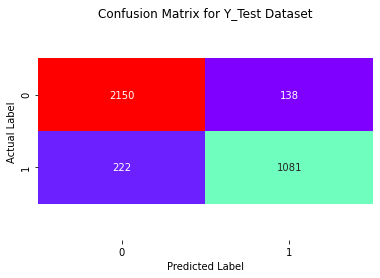

In [82]:
# PERFORMANCE METRIC FOR TRAINING AND TESTING DATASET

print('The accuracy score for the Training dataset is:',RFC_best.score(X_train, y_train))
print('\n')
print('The classification report for the Training dataset is:')
print(classification_report(y_train,ytrain_predict))
print('\n')
print('The accuracy score for the Testing dataset is:',RFC_best.score(X_test, y_test))
print('\n')
print('The classification report for the Testing dataset is:')
print(classification_report(y_test,ytest_predict))
print('\n')

confusion_matrix(y_train,ytrain_predict)
ax=sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Y_Train Dataset')
plt.show()

confusion_matrix(y_test,ytest_predict)
ax=sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Y_Test Dataset')
plt.show()

AUC: 0.981


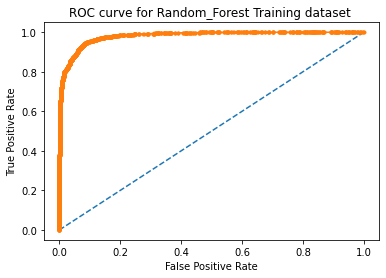

AUC: 0.965


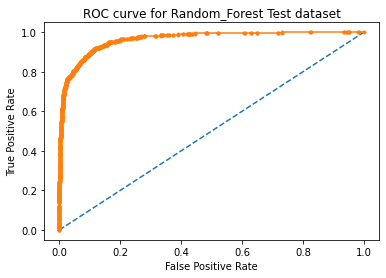

In [83]:
# AUC and ROC for the training data

# predict probabilities
probs = RFC_best.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
logm_train_fpr, logm_train_tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logm_train_fpr, logm_train_tpr, marker='.')
plt.title('ROC curve for Random_Forest Training dataset ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

# AUC and ROC for the testing data

# predict probabilities
probs = RFC_best.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
logm_test_fpr, logm_test_tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logm_test_fpr, logm_test_tpr, marker='.')
plt.title('ROC curve for Random_Forest Test dataset')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

In [85]:
RFC_best=RFC_best.predict(X_test)
RFC_best_predict=pd.Series(RFC_best)
sample_submission=pd.DataFrame(RFC_best_predict)
model_output=pd.concat((X,sample_submission))
model_output.to_csv('sample_submission1.csv',index= False)
sample_submission.head(10)

AttributeError: 'numpy.ndarray' object has no attribute 'predict'

In [ ]:
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(X_train,y_train)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_

In [ ]:
ytrain_predict = ExtC_best.predict(X_train)
ytest_predict = ExtC_best.predict(X_test)

In [ ]:
# PERFORMANCE METRIC FOR TRAINING AND TESTING DATASET

print('The accuracy score for the Training dataset is:',ExtC_best.score(X_train, y_train))
print('\n')
print('The classification report for the Training dataset is:')
print(classification_report(y_train,ytrain_predict))
print('\n')
print('The accuracy score for the Testing dataset is:',ExtC_best.score(X_test, y_test))
print('\n')
print('The classification report for the Testing dataset is:')
print(classification_report(y_test,ytest_predict))
print('\n')

confusion_matrix(y_train,ytrain_predict)
ax=sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Y_Train Dataset')
plt.show()

confusion_matrix(y_test,ytest_predict)
ax=sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Y_Test Dataset')
plt.show()

In [ ]:
# AUC and ROC for the training data

# predict probabilities
probs = ExtC_best.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
logm_train_fpr, logm_train_tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logm_train_fpr, logm_train_tpr, marker='.')
plt.title('ROC curve for Extra Tree Model Training dataset ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

# AUC and ROC for the testing data

# predict probabilities
probs = ExtC_best.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
logm_test_fpr, logm_test_tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logm_test_fpr, logm_test_tpr, marker='.')
plt.title('ROC curve for Extra Tree Test dataset')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

In [ ]:
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(X_train,y_train)

ada_best = gsadaDTC.best_estimator_

gsadaDTC.best_score_

In [ ]:
ytrain_predict = ada_best.predict(X_train)
ytest_predict = ada_best.predict(X_test)

In [ ]:
# PERFORMANCE METRIC FOR TRAINING AND TESTING DATASET

print('The accuracy score for the Training dataset is:',ada_best.score(X_train, y_train))
print('\n')
print('The classification report for the Training dataset is:')
print(classification_report(y_train,ytrain_predict))
print('\n')
print('The accuracy score for the Testing dataset is:',ada_best.score(X_test, y_test))
print('\n')
print('The classification report for the Testing dataset is:')
print(classification_report(y_test,ytest_predict))
print('\n')

confusion_matrix(y_train,ytrain_predict)
ax=sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Y_Train Dataset')
plt.show()

confusion_matrix(y_test,ytest_predict)
ax=sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Y_Test Dataset')
plt.show()

In [ ]:
# AUC and ROC for the training data

# predict probabilities
probs = ada_best.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
logm_train_fpr, logm_train_tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logm_train_fpr, logm_train_tpr, marker='.')
plt.title('ROC curve for ada boosting Model Training dataset ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

# AUC and ROC for the testing data

# predict probabilities
probs = ada_best.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
logm_test_fpr, logm_test_tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logm_test_fpr, logm_test_tpr, marker='.')
plt.title('ROC curve for ada boosting model Test dataset')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

In [ ]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200],
              'learning_rate': [0.1, 0.05],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

In [ ]:
ytrain_predict = gsGBC.predict(X_train)
ytest_predict = gsGBC.predict(X_test)

In [ ]:
# PERFORMANCE METRIC FOR TRAINING AND TESTING DATASET

print('The accuracy score for the Training dataset is:',gsGBC.score(X_train, y_train))
print('\n')
print('The classification report for the Training dataset is:')
print(classification_report(y_train,ytrain_predict))
print('\n')
print('The accuracy score for the Testing dataset is:',gsGBC.score(X_test, y_test))
print('\n')
print('The classification report for the Testing dataset is:')
print(classification_report(y_test,ytest_predict))
print('\n')

confusion_matrix(y_train,ytrain_predict)
ax=sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Y_Train Dataset')
plt.show()

confusion_matrix(y_test,ytest_predict)
ax=sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Y_Test Dataset')
plt.show()

In [ ]:
# AUC and ROC for the training data

# predict probabilities
probs = gsGBC.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
logm_train_fpr, logm_train_tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logm_train_fpr, logm_train_tpr, marker='.')
plt.title('ROC curve for Gradient boosting Model Training dataset ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

# AUC and ROC for the testing data

# predict probabilities
probs = gsGBC.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
logm_test_fpr, logm_test_tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logm_test_fpr, logm_test_tpr, marker='.')
plt.title('ROC curve for Gradient boosting model Test dataset')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

In [ ]:
nrows = ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))

names_classifiers = [("AdaBoosting", ada_best),("ExtraTrees",ExtC_best),("RandomForest",RFC_best),("GradientBoosting",GBC_best)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:40]
        g = sns.barplot(y=X_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 1

In [ ]:
'''import matplotlib.colors 
plt.figure(figsize=(15,10))
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(logm_test_fpr, logm_test_tpr, color='cyan',label='LOGIT')
plt.plot(ldam_test_fpr, ldam_test_tpr, color='black',label='LDA')
plt.plot(knnm_test_fpr, knnm_test_tpr, color='blue',label='KNN')
plt.plot(nbb_test_fpr, nbb_test_tpr, color='green',label='NB')
plt.plot(svm_test_fpr, svm_test_tpr, color='purple',label='SVM')
plt.plot(bcb_test_fpr, bcb_test_tpr, color='pink',label='Bagging-DT')
plt.plot(bagb_test_fpr,bagb_test_tpr, color='orange',label='Bagging-RF')
plt.plot(ada_test_fpr,ada_test_tpr, color='brown',label='ADA-Boosting')
plt.plot(gb_test_fpr,gb_test_tpr, color='red',label='Gradient-Boosting')
plt.plot(xgb_test_fpr,xgb_test_tpr, color='yellow',label='XG-Boosting')

plt.title('ROC CURVE comparision for All tuning models on test data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(bbox_to_anchor=(0.,1.02,1.0,0.102),loc='best')'''